<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/PCA_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача: необходимо проанализировать датасет ирисов, визуализировать исходные признаки, стандартизировать данные для устранения масштабных различий, применить метод главных компонент (PCA) для снижения размерности и визуализировать полученные компоненты, чтобы выявить основные направления вариации и структуру данных.**

In [1]:
# Импортируем библиотеки для работы с данными и визуализацией
import pandas as pd  # для работы с таблицами данных
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns  # для красивых графиков на основе matplotlib

# Импортируем модули из scikit-learn для работы с датасетами и алгоритмами машинного обучения
from sklearn import datasets  # для загрузки встроенных датасетов
from sklearn.preprocessing import StandardScaler  # для стандартизации данных
from sklearn.decomposition import PCA  # для метода главных компонент

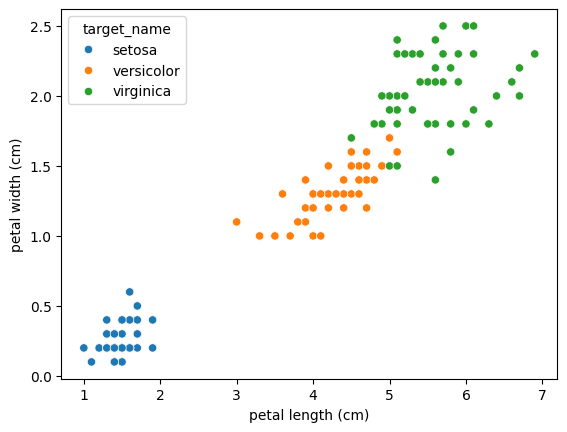

In [2]:
# Загружаем датасет ирисов
iris = datasets.load_iris()

# Создаём DataFrame из данных ирисов
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Добавляем целевую переменную (метки классов)
data['target'] = pd.Series(data=iris['target'])

# Создаём колонку с названиями классов вместо числовых меток
data['target_name'] = data['target'].replace([0, 1, 2], list(iris['target_names']))

# Строим график рассеяния по длине и ширине лепестков, цветом обозначая класс
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='target_name')
plt.show()  # отображаем график

In [5]:
# Выбираем только признаки для дальнейшей обработки
features = ['petal length (cm)', 'petal width (cm)']

# Оставляем в данных только выбранные признаки
data = data[features]

# Инициализируем объект для стандартизации данных
scaler = StandardScaler()

# Применяем стандартизацию и создаём новый DataFrame с преобразованными данными
data_scaled = pd.DataFrame(data=scaler.fit_transform(data), columns=features)
data_scaled

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


In [10]:
# Инициализируем PCA без ограничения по количеству компонент
pca = PCA()

# Обучаем PCA на стандартизированных данных и преобразуем их
data_pca = pd.DataFrame(pca.fit_transform(data_scaled), columns=['pc1', 'pc2'])
data_pca

,pc1,pc2
0,-1.877843,-0.017524
1,-1.877843,-0.017524
2,-1.918033,-0.057714
3,-1.837653,0.022666
4,-1.877843,-0.017524
...,...,...
145,1.604020,-0.444937
146,1.151328,-0.153005
147,1.324786,-0.165703
148,1.684401,-0.364557


In [11]:
# Получаем компоненты PCA (направления главных компонент)
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [12]:
# Получаем долю объяснённой дисперсии каждой компоненты
pca.explained_variance_ratio_

array([0.98143272, 0.01856728])

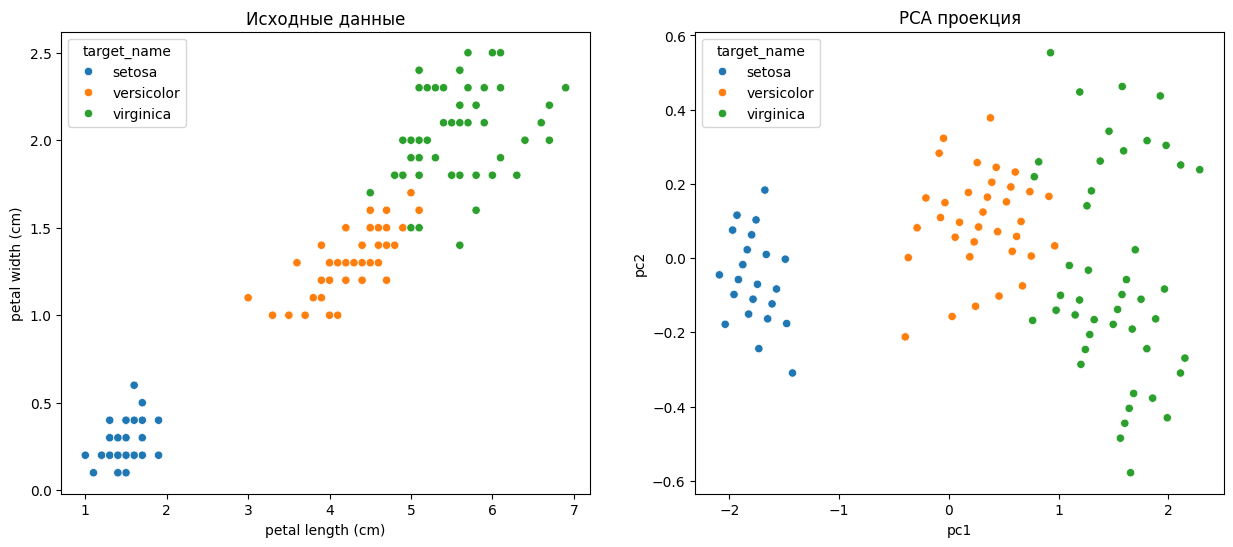

In [8]:
# Восстанавливаем колонку с целевыми метками
data['target'] = pd.Series(data=iris['target'])

# Восстанавливаем названия классов
data['target_name'] = data['target'].replace([0, 1, 2], list(iris['target_names']))

# Создаём фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Построение графика по исходным признакам
sns.scatterplot(
    data=data,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='target_name',
    ax=ax1
)
ax1.set_title('Исходные данные')

# Построение графика по компонентам PCA
sns.scatterplot(
    data=data_pca,
    x='pc1',
    y='pc2',
    hue=data['target_name'],
    ax=ax2
)
ax2.set_title('PCA проекция')

plt.show()  # отображаем оба графика